# Project: Investigate a Dataset (Medical Appointment No Show)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Brief about the dataset**: It is a medical dataset that collects information about patients in brazil. The main focuse is wاhether the patient shows up for the appointment he perviously schedueld or not. Also some inforamtion about the patient is provided to consider them as factors of his absence or presence.  
  
The data provided is :  
1-PatientId: Identification of a patient  
2- AppointmentID: Identification of each appointment  
3-Gender and Age  
4-ScheduledDay : time when the patient scheduled appointment  
5-AppointmentDay : time of the actual appointment  
6-Neighbourhood: place of the hoispital  
7-Scholarship :if patient is enrolled in brazilian welfare program  
8- Medical records :Hipertension , Diabetes , Alcoholism ,Handcap  
9-SMS_received if the patient received a message about his appointment   
10-No-show: patient showed up for the appointment nor not   


In [75]:
#Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [76]:
#load data set from csv format to pandas dataframe
df= pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [77]:
#Getting more info about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


###### We can see that we have no missing values and our shape is (110527,14)   
As for data types we can consider some notes  
1-PatientId should be int rather than float  
2-For ScheduledDay and AppointmentDay, working with them as a datetime rather than strings would be better  
3-To make things easier, we can consider turning No-show to int    
  
  

  
  
  




In [78]:
#Statistical Information
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We could note the following:  
1-Age mean is about 37 ,but it has a minimum value of -1 and that's wrong   
2- It is hard to konw any information about PatientId and AppointmentID because of there format , so might need to change them to long datatype  
3-Handcap values are between 0-4 while diabetes & alcoholism & hipertension values are either 0 or 1  
4- SMS_received & Scholarship are either 0 or 1  


In [79]:
#Investigate Age values
print(" Number of ages below 1 years old : "+str(df[df['Age'] < 1].shape[0]))
print(" Number of ages that are negative : "+str(df[df['Age'] < 0].shape[0]))

 Number of ages below 1 years old : 3540
 Number of ages that are negative : 1


We can note that there is a lot of records that are zeros old ,we can consider them as infants  
but for the negative value ,we could remove that record from the dataset as it could be a typo mistake

In [80]:
#test of their is any duplicated values in the dataset
df.duplicated().any()

False

In [81]:
df['PatientId'].nunique()

62299

In [82]:
df['AppointmentID'].nunique()

110527

AppointmentID is a unique value, while PatientId could be used more than once   
This dataset contains some appointments scheduled by the same patient

In [83]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

There are 4 types of handcap

Assumptions for Analytical Questions:  
1-We could assuem that when time increases between the scheduel day and the appointment day ,that would increase the chance of the patients absence.  
2-Receiving a message would propably help patients to remember their appointments and would increase the chance of show up  
3-Since there is a large portion of females in the dataset, we could assume that females care more about their health and would propably show up more than males  
4-The age of the patient would make insights about the patient's health condition ,the patients state would surely affect his decision to show up or not  


### Data Cleaning (Replace this with more specific notes!)

In [84]:
#Remove unneccessary columns : 'AppointmentID' ,'Neighbourhood'  we probably won't use it.
df.drop(columns=['AppointmentID','Neighbourhood'],inplace=True)
df.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

In [85]:
 #It would be more cnovenient to rename column names to lower case and '_' seperated
df.rename(columns=lambda x :re.sub("-","_",x).lower(),inplace=True)
df.rename(columns={"patientid":"patient_id","scheduledday":"scheduled_day","appointmentday":"appointment_day"},inplace=True)
df.columns

Index(['patient_id', 'gender', 'scheduled_day', 'appointment_day', 'age',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no_show'],
      dtype='object')

In [86]:
#Investigate record with typo age = -1
df[df['age']==-1]

,patient_id,gender,scheduled_day,appointment_day,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,0,0,0,0,0,0,No


In [87]:
##drop row with typo 
df.drop(df[df['age']==-1].index,inplace=True)
df.shape

(110526, 12)

In [88]:
#change data types 
#change patient_id to long
df['patient_id']=df['patient_id'].astype('long')
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,558997776694438,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,4262962299951,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,867951213174,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,8841186448183,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


In [89]:
#change app/sche day to datetime
df['scheduled_day']=pd.to_datetime(df['scheduled_day'])
df['appointment_day']=pd.to_datetime(df['appointment_day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
patient_id         110526 non-null int64
gender             110526 non-null object
scheduled_day      110526 non-null datetime64[ns]
appointment_day    110526 non-null datetime64[ns]
age                110526 non-null int64
scholarship        110526 non-null int64
hipertension       110526 non-null int64
diabetes           110526 non-null int64
alcoholism         110526 non-null int64
handcap            110526 non-null int64
sms_received       110526 non-null int64
no_show            110526 non-null object
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 11.0+ MB


In [90]:
#change No-show column to int
df['no_show']=df['no_show'].map({'No':0,'Yes':1})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
patient_id         110526 non-null int64
gender             110526 non-null object
scheduled_day      110526 non-null datetime64[ns]
appointment_day    110526 non-null datetime64[ns]
age                110526 non-null int64
scholarship        110526 non-null int64
hipertension       110526 non-null int64
diabetes           110526 non-null int64
alcoholism         110526 non-null int64
handcap            110526 non-null int64
sms_received       110526 non-null int64
no_show            110526 non-null int64
dtypes: datetime64[ns](2), int64(9), object(1)
memory usage: 11.0+ MB


In [91]:
print(df.scheduled_day[0] , df.appointment_day[0] )

2016-04-29 18:38:08 2016-04-29 00:00:00


We can note that appointment time does not contain any information about (hour-minute-second) so we can remove the clock info from scheduled time for comparison reasons by setting them to zeros 

In [92]:
#setting (hour - minute - second ) info in scheduled time to zero to be comparable with appointment time
df['scheduled_day']=df['scheduled_day'].apply(lambda x:x.replace(hour=0,minute=0,second=0))   

In [93]:
##Rather than dealing with different types of handcap ,we could map all of them to 1 as handcap and 0 as not handcap
df['handcap']=df['handcap'].replace([2,3,4],1)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Does the time between appointment_day and scheduled_day affects the patients decision to show up ?)

In [94]:
##First we need to calculate the difference in time 
df['difference_in_time']=df['appointment_day']-df['scheduled_day']
df['difference_in_time'].head()

0   0 days
1   0 days
2   0 days
3   0 days
4   0 days
Name: difference_in_time, dtype: timedelta64[ns]

In [95]:
## We need to extract number of days as an integer from the resulted time delta
df['difference_in_time']=df['difference_in_time'].apply(lambda x:int(re.findall(r'\d+',str(x))[0]))
df['difference_in_time'].head()

0    0
1    0
2    0
3    0
4    0
Name: difference_in_time, dtype: int64

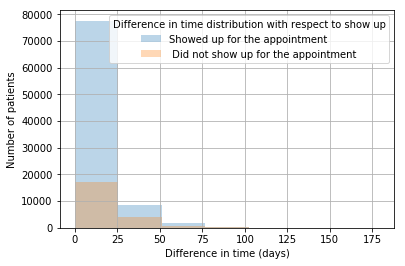

In [96]:
##Ploting relation between difference_in_time and no_show
df.difference_in_time[df['no_show']==0].hist(alpha=0.3,label="Showed up for the appointment", bins=7);
df.difference_in_time[df['no_show']==1].hist(alpha=0.3,label=" Did not show up for the appointment",bins=7);
plt.xlabel("Difference in time (days)");
plt.ylabel("Number of patients");
plt.legend(title="Difference in time distribution with respect to show up");

From the graph we can see that:  
1-Most people perfered to schedule their appointment about (0-25) days far from the schedule day    
2-People tend to not show to their appointment when the difference in time increases  

Below you could look at these findings in percentages


In [97]:
##Define a function to calculate percentage of patients that did not show up for the appointment withn (x) days from schedule time
def per_of_not_showing_up (x,y,df_temp):
    mask1=(df_temp['no_show']==0) & ( df_temp['difference_in_time'] <= y)& (df_temp['difference_in_time'] >= x)
    mask2=(df_temp['no_show']==1) &(df_temp['difference_in_time'] <= y)& (df_temp['difference_in_time'] >= x)
    temp1=df_temp.difference_in_time[mask1].shape[0]
    temp2=df_temp.difference_in_time[mask2].shape[0]
    print("Percentage: ",np.round((temp2/(temp1+temp2))*100,2),"%")
    return ;

In [98]:
## Calculate percentage of patients that did not show up for the appointment withn (0-25) days from schedule time 
per_of_not_showing_up(0,25,df)

Percentage:  18.19 %


In [99]:
## Calculate percentage of patients that did not show up for the appointment withn (25-50) days from schedule time 
per_of_not_showing_up(26,50,df)

Percentage:  32.86 %


In [100]:
## Calculate percentage of patients that did not show up for the appointment withn (50-75) days from schedule time
per_of_not_showing_up(51,75,df)

Percentage:  30.77 %


We can note that when time differnece increases the percentage of people that do not show up increases

### Research Question 2  (Does the received_message factor affects the number of no_show? )

In [101]:
#First let's investigate the number of patients that got messages 
np.mean(df["sms_received"])

0.32102853627200839

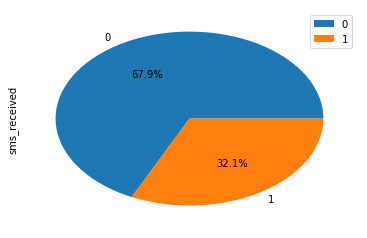

In [102]:
df["sms_received"].value_counts().plot(kind="pie",autopct='%1.1f%%');
plt.legend();

We could note that only 32.1% of patients got the sms and 67.9% did not. And that is really a big portion of data that we need to consider why they did not receive it 


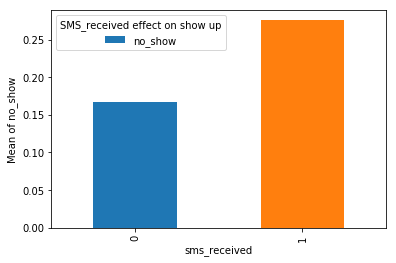

In [103]:
##  sms_recived / no_show graph
df.groupby('sms_received').no_show.mean().plot(kind="bar")
plt.ylabel("Mean of no_show")
plt.legend(title="SMS_received effect on show up")


We can notice that people who received the sms message have a higher mean to not show up than people who didn't receive the message, most of the patients didn't get the sms so we cannot assume that receiving the sms decreases your chance of going to your appointment

In [104]:
print(df[df["sms_received"]==1].no_show.mean())
print(df[df["sms_received"]==0].no_show.mean())

0.275745448396
0.167035339268


In [105]:
#investigate sms_received effect
df.groupby(['difference_in_time','sms_received']).no_show.mean()

difference_in_time  sms_received
0                   0               0.046471
1                   0               0.214108
2                   0               0.238216
3                   0               0.246313
                    1               0.213024
4                   0               0.243739
                    1               0.224623
5                   0               0.300082
                    1               0.245862
6                   0               0.279911
                    1               0.232116
7                   0               0.278210
                    1               0.258596
8                   0               0.297085
                    1               0.281250
9                   0               0.286184
                    1               0.266800
10                  0               0.352092
                    1               0.280802
11                  0               0.340594
                    1               0.290456
12                  0 

We could note from the values above the problem of sms_received. The problem that is a large portion of patients booked their appointment about (0-3) days far from the schedule day and in all these days no messages were sent. We can tell that the hospital send messages only after 3 days from the schedule. To make a fair comparison , we could exclude the (0-3) days difference from the dataset and recompute our values

In [106]:
##Mean no_show of patients while difference in time is greater than 2 days and sms is received
df[(df["difference_in_time"] >2 ) & (df["sms_received"]==1)].no_show.mean()

0.27574544839637

In [107]:
##Mean no_show of patients while difference in time is greater than 2 days and sms is not received
df[(df["difference_in_time"] >2 ) & (df["sms_received"]==0)].no_show.mean()

0.32697636511817441

We could now surely tell that when patient receives the message ,that would increase the chance to show up

In [108]:
##Mean no_show of patients while difference in time is smaller than 3 days and sms is received
df[(df["difference_in_time"] < 3 ) & (df["sms_received"]==1)].no_show.mean()

nan

In [109]:
##Mean no_show of patients while difference in time is smaller than 3  days and sms is not received
df[(df["difference_in_time"] < 3 ) & (df["sms_received"]==0)].no_show.mean()

0.089319657848883252

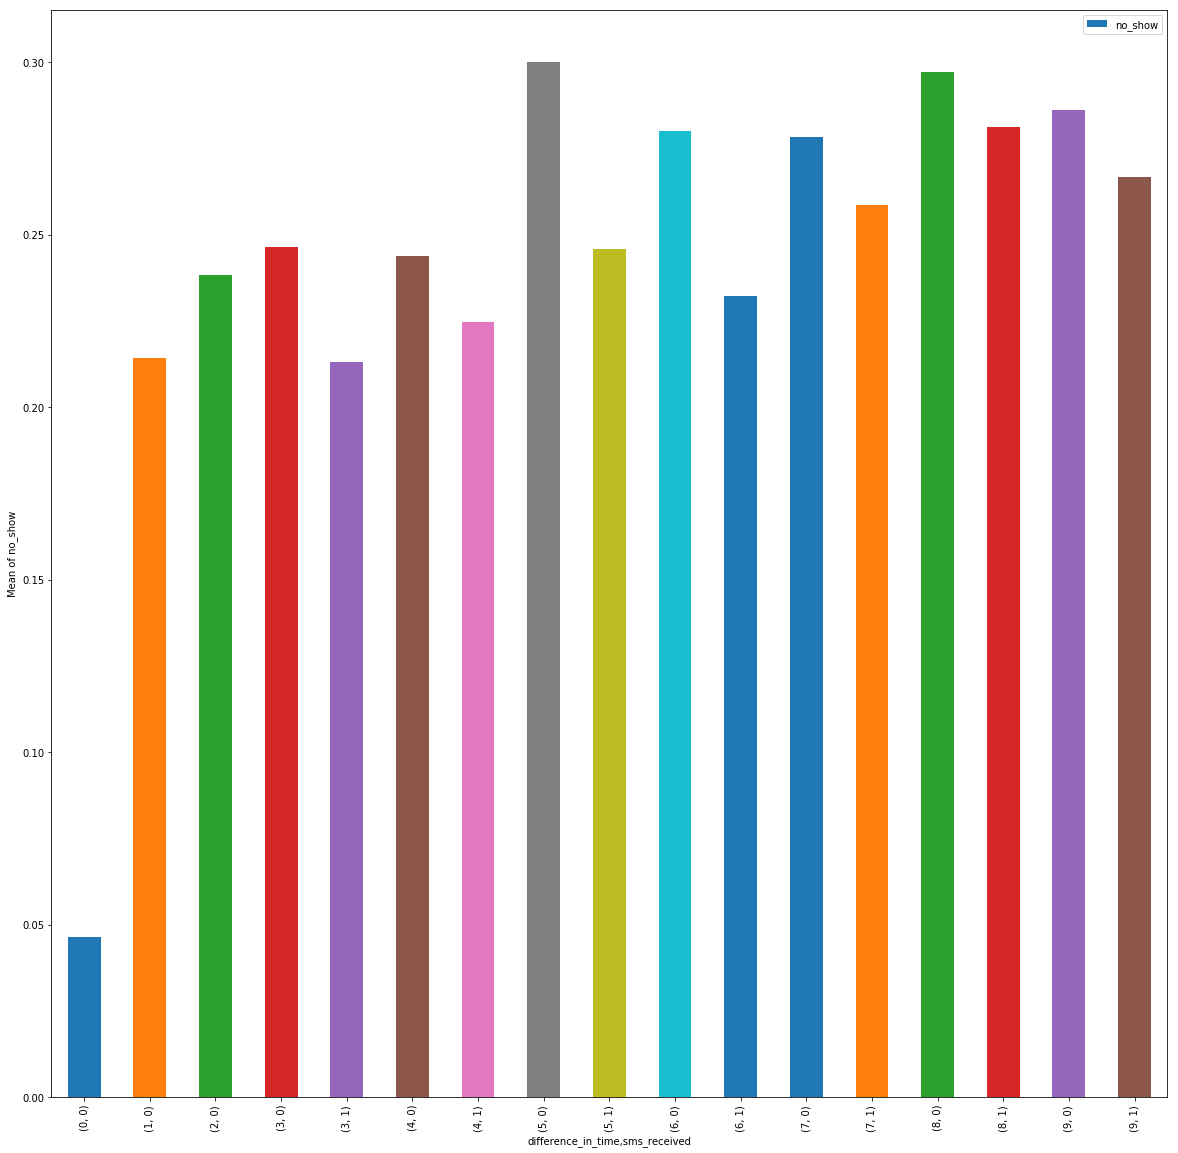

In [110]:
#Plot first 10 values of difference_in_time with respect to sms_received and no_show mean
df[df["difference_in_time"] < 10].groupby(['difference_in_time','sms_received']).no_show.mean().plot(kind="bar",figsize=(20,20))
plt.ylabel("Mean of no_show")
plt.legend();

We could clearly note from the bar graph that for the difference in time (0-2) no patient received the message, and that for any time difference larger than 2 the no show mean decreses when the sms is received

### Research Question 3  (Does the gender factor affects the number of no_show? )

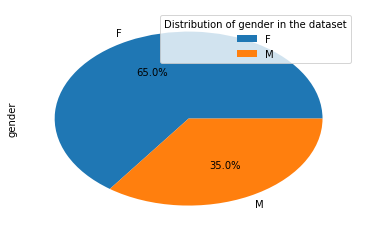

In [111]:
##Investigate Distribution of gender
df["gender"].value_counts().plot(kind="pie",autopct='%1.1f%%');
plt.legend(title="Distribution of gender in the dataset");

We could note that females tend to book medical appointments more than males and that shows that females take care of their health better than males  

In [112]:
##Investigate the no_show mean in each gender
df.groupby(['gender']).no_show.mean()

gender
F    0.203149
M    0.199679
Name: no_show, dtype: float64

In [113]:
df[(df['gender']=='F') &(df['no_show']==0)].no_show.count() / df[df['no_show']==0].no_show.count()

0.64898477445100733

In [114]:
df[(df['gender']=='M') &(df['no_show']==0)].no_show.count() / df[df['no_show']==0].no_show.count()

0.35101522554899273

It is hard to tell that on of the two genders seems to show up more often for this appointment.The percentages for their show up ratio is similar to the gender existence accross the whole dataset

### Research Question 4  (Does the Age of the patient affects the number of no_show? )

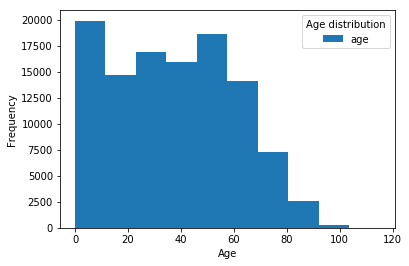

In [115]:
##Age distribution 
df.age.plot(kind="hist",bins=10)
plt.xlabel("Age");
plt.legend(title="Age distribution");

We could not that:  
1-There is large portion of infants in the age distribution ( 0 age)  
2-Maximum age exceeds 100  
3-The average age is around 40

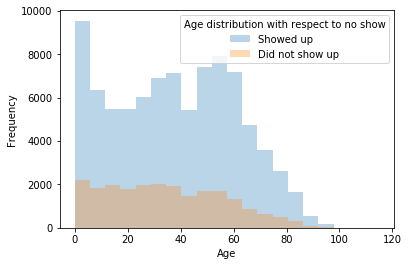

In [116]:
##Age - no_show distribution
df[df['no_show']==0].age.plot(alpha=0.3,kind='hist',label="Showed up",bins=20);
df[df['no_show']==1].age.plot(alpha=0.3,kind='hist',label="Did not show up",bins=20);
plt.xlabel("Age")
plt.legend(title="Age distribution with respect to no show");

It is clear that infants tend to show up the most and to compare them to the other age ranges we can see below the different age ranges no show mean to make a fair comparison

In [117]:
df[df["age"] == 0].no_show.mean()

0.1805594800791184

In these cells below , we investigate the no_show mean for different age ranges 

In [118]:
def age_no_show_mean(x,y,df):
    print("The mean of No-show is : ", df[ (x < df["age"]) &(df["age"] < y)].no_show.mean())
    return;  

In [119]:
age_no_show_mean(0,21,df)

The mean of No-show is :  0.228090006712


In [120]:
age_no_show_mean(20,41,df)

The mean of No-show is :  0.229790185538


In [121]:
age_no_show_mean(40,61,df)

The mean of No-show is :  0.185864831621


In [122]:
age_no_show_mean(60,81,df)

The mean of No-show is :  0.150029568303


In [123]:
age_no_show_mean(80,101,df)

The mean of No-show is :  0.163796133568


In [124]:
df[100 < df["age"]].no_show.mean()

0.42857142857142855

We can note the following:  
1-Infants and people between ( 40 -100 )  often shows up for the appointment   
2-Children and youth (1-40 ) have average chance to show up about 0.22 as the whole dataset   
3-Patients who are higher than 100 have lower chance of showing up 

### Distribution of patient's medical information

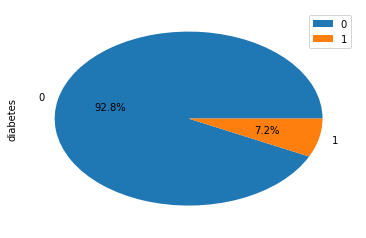

In [125]:
##Investigating the distribution of patients that have diabetes
df["diabetes"].value_counts().plot(kind="pie",autopct='%1.1f%%');
plt.legend();

About 7.2% of the patients suffered from diabetes and about 92.8%  does not have diabetes

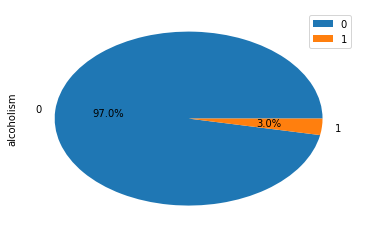

In [126]:
##Investigating the distribution of patients that have alcoholism
df["alcoholism"].value_counts().plot(kind="pie",autopct='%1.1f%%');
plt.legend();

Only a small portion suffered from alcoholism about 3% and about 97% of the data was not alcoholism

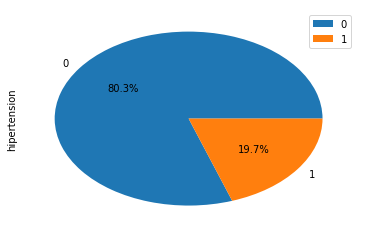

In [127]:
##Investigating the distribution of patients that have hipertension
df["hipertension"].value_counts().plot(kind="pie",autopct='%1.1f%%');
plt.legend();

About 19.7% of the patients suffered from hipertension and that is the most popular disease among the dataset

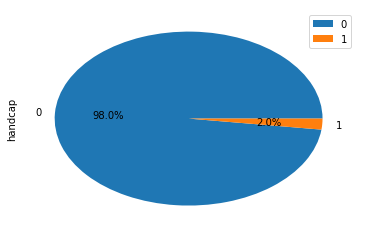

In [128]:
##Investigating the distribution of patients that have handcap
df["handcap"].value_counts().plot(kind="pie",autopct='%1.1f%%');
plt.legend();

A small portion only of the data has handcap and that is about 2% 

<a id='conclusions'></a>
## Conclusions
 Limitations:  
 1-A large portion of the patients did not get the sms beacuse their appointment was between (0-2) days from the scheduel day       and that affected and misleaded the analysis.  
 2-Only few numbers of patients had scholarship and that limited the chance of studying its effect on the no-show ratio    
 3-The age information was a little bit confusing due to the fact that some patients have an age of 0   
 4-The handcap column has different values than just true or false , some patients had values of (2-3-4) and it was not clear       what it does really means    
 
 
 Findings  :  
 1-Patients tend to not show to their appointment when the difference in time between scheduel day and the appointment day 
 increases   
 2- For patients who booked their appointment to be more than 3 days far from the scheduel day receiving a message would    
 increase their chance to show up for the appointment  
 3-Females and Males have equal chance of showing up (Gender does not play a great role in the show up ratio)  
 4-Infants (0 years old ) and people between ( 40 -100 years old )  often shows up for the appointment   
 5-Children and youth (1-40 years old ) have average chance to show up about 0.22 as the whole dataset   
 6-Patients who are higher than 100 years old have lower chance of showing up 
 
 


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [129]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0